<a href="https://colab.research.google.com/github/Elwing-Chou/ximen1129/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


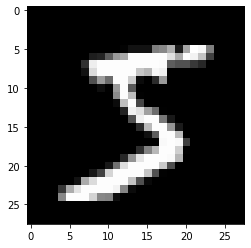

In [3]:
# matplotlib colormap
import pandas as pd
import matplotlib.pyplot as plt
idx = 0
pd.DataFrame(x_train[idx])
# , cmap="PiYG_r"
print(y_train[idx])
plt.imshow(x_train[idx], cmap="gray")

In [4]:
from tensorflow.keras.models import Sequential
# 全連接層
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 多個輸出(多元分類): CategoricalCrossEntropy sigma(pilog1/qi)
# 單個輸出(二元分類): BinaryCrossEntropy plog1/q + (1-p)log1/(1-q)
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
# -1:自動算
x_train_norm = x_train.reshape(-1, 784) / 255.0
x_test_norm = x_test.reshape(-1, 784) / 255.0
pd.DataFrame(x_train_norm[0])

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
779,0.0
780,0.0
781,0.0
782,0.0
